In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

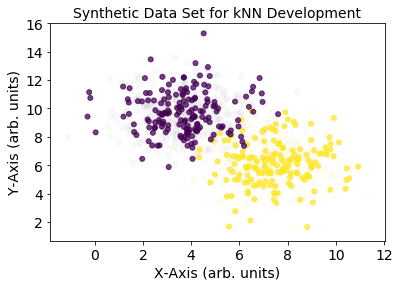

In [2]:
'''
Generate training dataset for k-NN Development.
'''
X, y = make_blobs(n_samples=1000, 
                              centers=2, 
                              n_features=2,
                              cluster_std=1.5, 
                              center_box=(0, 10),
                              random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


'''
Plot out both datasets.
'''
plt.scatter(X_test[:, 0], X_test[:, 1], s=25, c=y_test, zorder=100, alpha=0.75)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.025)
plt.title('Synthetic Data Set for kNN Development', fontsize=14)
plt.xlabel('X-Axis (arb. units)', fontsize=14)
plt.ylabel('Y-Axis (arb. units)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()                                    

### k-NN Algorithm

1. Determine the number for `k`. This should be an odd number in order to avoid any ties when voting at the end 
2. Find distance from new point to all of the points in the dataset and add to an `np.array`.
3. Sort the `a = np.array()` in ascending order using `b = np.sort(a, axis=None)`
4. Pull out the first `k` elements from the sorted listed such that these are the `k` elements with the smallest distance using `c =b[k]` or `np.take()`.
5. For each of these `k` elements, determine the majority and assign that class to the new point using `d = np.argmax(np.bincount(c))`. The class of `d` is the classifiction of the new point. 

In [3]:
num_k = 5

In [4]:
#TODO: Calcualte distance from each point in the test set to each point in the training set
#TODO: Add the distances to a new array and sort the array.
#TODO: Pull out the indicies of the first k values of the array and determine the class of each.
#TODO: Assign the class of each test class based on the most frequent assignment of each.

In [5]:
_dist_array = (((X_train[:, 0] - X_test[4][0])**2) + ((X_train[:, 1] - X_test[4][1])**2))**(0.5)

In [6]:
_dist_array

array([ 7.89011803,  2.29309276,  8.78388281,  6.36988326,  2.74396599,
        6.52526656,  5.82155239,  1.66990225,  6.17506496,  2.43239068,
        0.15763006,  6.2285178 ,  6.14495631,  2.41964325,  1.52503992,
        1.39857429,  2.02456721,  5.14055276,  5.98199719,  5.59018782,
        3.28143028,  3.84631657,  0.50248629,  3.3330513 ,  7.42504629,
        1.77772716,  5.55748878,  2.278085  ,  0.92813769,  4.36674377,
        4.38167364,  2.64756668,  8.40368266,  2.55801572,  1.57419245,
        3.3521528 ,  1.2337423 ,  1.91213374,  0.55968189,  2.49202716,
        4.19481857,  1.34860581,  5.38651528,  2.2661627 ,  6.74336762,
        4.86235384,  6.42734845,  1.59578513,  6.66810052,  2.83477803,
        1.11548353,  1.11844089,  2.00898325,  5.46586341,  1.81582248,
        1.05727679,  1.7578787 ,  6.29997369,  0.75516288,  0.62936798,
        1.1946387 ,  7.4758827 ,  4.76723936,  0.42640347,  5.09069243,
        4.96430681,  6.37148598,  7.88047634,  2.27393428,  6.77

In [7]:
_dist_array_sort = np.sort(_dist_array)
_dist_array_sort

array([ 0.14305617,  0.15763006,  0.16066563,  0.28257355,  0.29704006,
        0.31774546,  0.35007597,  0.35384827,  0.42640347,  0.43942529,
        0.4505142 ,  0.45366894,  0.47418691,  0.4788691 ,  0.4819437 ,
        0.49741917,  0.50248629,  0.50917605,  0.53116288,  0.54346138,
        0.55968189,  0.5654859 ,  0.57549728,  0.57647971,  0.58032356,
        0.5909909 ,  0.59781131,  0.5989916 ,  0.62368198,  0.62936798,
        0.63065853,  0.66478184,  0.67951572,  0.69349958,  0.69395865,
        0.7188553 ,  0.75308818,  0.75516288,  0.7601385 ,  0.81066998,
        0.81332968,  0.81967064,  0.83380182,  0.84386067,  0.85650444,
        0.86930288,  0.89880415,  0.91823747,  0.92681015,  0.92813769,
        0.93135157,  0.94918549,  0.96350148,  0.96618461,  0.97125386,
        0.97414911,  0.98350375,  1.00062804,  1.00490015,  1.00795965,
        1.01166383,  1.02303593,  1.02774835,  1.03734808,  1.04551685,
        1.04802093,  1.05727679,  1.05994475,  1.06434924,  1.06

In [8]:
np.argsort(_dist_array)

array([542,  10, 246, 512, 657, 550, 414, 666,  63, 436, 460, 183, 470,
       193, 649, 239,  22, 224, 243, 206,  38, 661, 617, 596, 186, 662,
        73, 300, 586,  59, 562, 344, 620, 105, 621,  89, 327,  58, 628,
       668, 480, 464, 170, 106, 282, 406, 495, 467, 555,  28, 624, 289,
       395, 324, 582, 644, 144, 607, 367, 242, 218, 178, 602, 498, 599,
       203,  55, 227, 226, 499, 287, 276, 146, 260, 490, 358, 111, 517,
        50,  51, 331, 571, 250, 369, 539, 211,  60, 284, 549, 185, 241,
        36, 378, 588, 626, 182, 581, 364, 346, 489, 443, 345,  41, 473,
       574, 622,  79, 425, 366, 124,  15, 232, 320, 177, 669, 409, 659,
        97, 314, 597, 545, 481, 225, 493, 472,  14,  77, 263, 570, 479,
       579,  90, 307,  34, 236,  94,  47, 565, 478, 554, 386, 304, 516,
       201, 413, 535, 109, 385, 136,   7, 140, 267, 510,  83, 611, 466,
       513,  56,  25, 277,  75,  54, 273, 524, 318, 249, 590, 343, 391,
       305, 421,  78, 171, 457,  80,  37, 228, 444, 221, 102, 62

In [9]:
y_train[np.argsort(_dist_array)]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
y_test

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,